In [3]:
import random 
import numpy as np
import matplotlib.pyplot as plt

### Creamos una función que como resultado final devuelve los valores para la función de correlación de segundo orden $g^{(2)}(0)$

In [2]:
def correlacion(t,fot,detect):
    # Como primer paso simulamos el conteo de fotones dentro de detectores 
    proba_1=fot/t
    proba_2=detect/t
    transmitidos,reflejados,testigos=np.empty(int(t)),np.empty(int(t)),np.empty(int(t))
    conteo_test=0
    
    for  i in range(int(t)):
       
        if random.random()<=proba_1:
            
            transmitidos[i]=1
        else:
            
            transmitidos[i]=0
        
        if random.random()<=proba_1:
            
            reflejados[i]=1
        else:
            
            reflejados[i]=0
    
        if random.random()<=proba_2:
            
            testigos[i]=1
            
            conteo_test+=1
            
        else:
            
            testigos[i]=0
    
    #----------------------------------
    # Contamos los llamados fotones testigos y reflejados de igual manera es un conteo aleatorio
    a=np.zeros(len(transmitidos))
    b=np.zeros(len(reflejados))
    
    for i in range(int(t)):
    
        if random.random()>=0.5:
            
            a[i]=testigos[i]
        else:
            
            b[i]=testigos[i]
            
        
    #---------------------------------
    #Hacemos un conteo total de transmitidos y reflejados
    suma_transmitidos=transmitidos+a
    
    suma_reflejados=reflejados+b
    
    total_tr=0
    
    total_ref=0
    
    for i in range(int(t)):
        
        if suma_transmitidos[i]!=0:
            
            total_tr+=1
            
        if suma_reflejados[i]!=0:
            
            total_ref+=1
    #---------------------------------
    #Hacemos un conteo de coincidencias
    
    coincidencias_TR=0
    
    coincidencias_TRT=0
    
    coincidencias_TT=0
    
    coincidencias_RT=0
    
    for i in range(int(t)):
        
        if (suma_transmitidos[i]*suma_reflejados[i])!=0:
            
            coincidencias_TR+=1
            
        if (suma_transmitidos[i]*suma_reflejados[i]*testigos[i])!=0:
            
            coincidencias_TRT+=1
            
        if (suma_transmitidos[i]*testigos[i])!=0:
            
            coincidencias_TT+=1
            
        if (suma_reflejados[i]*testigos[i])!=0:
            
            coincidencias_RT+=1
    #--------------------------------
    #Obtenemos los valores de ineteres
    
    g_2=(coincidencias_TR/(total_ref*total_tr))*(t*1)
    
    g_3=(coincidencias_TRT/(coincidencias_TT*coincidencias_RT))*(conteo_test)
    
    return [g_2,g_3]

Hacemos algunas pruebas de nuestra función

In [3]:
correlacion(9E5,5E5,5E3)

[0.9992907449954357, 0.9223066379516396]

Se crean diferentes simulaciones con diferentes valores de entrada para obtener resultados comparables

In [173]:
for i in range(4):
    print(correlacion(1E6,5E5,5E3))

[1.0004898401097806, 0.8887754002994]
[0.9993611787193526, 0.8957568964492828]
[1.000505048911605, 0.8895778447298219]
[1.0007273769902618, 0.8878063414151608]


Se obtienen los promedios y las desviaciones de las diferentes simulaciones

In [1]:
g_2_means=[1.00209933,1.00017904,0.99928267,0.99946395,0.99998613,0.99999403,1.00004382,1.0,1.0]
g_3_means=[0.06486831,0.18108329,0.32953994,0.39443264,0.48980452,0.64040931,0.88701926,1.0,1.0]
g_2_std=[0.01353478,0.0068697,0.00385068,0.0028636,0.00337401,0.00192536,0.00092585,0.0,0.0]
g_3_std=[0.00847699,0.0091085,0.01002301,0.00973139,0.01325738,0.00935205,0.00346355,4.96506831e-17,2.02698065e-17]
x=[3.3E-8,1E-7,2E-7,2.5E-7,3.3E-7,5E-7,1E-6,2E-6,2.5E-6]

In [4]:
g_2_std=np.array(g_2_std)
g_3_std=np.array(g_3_std)

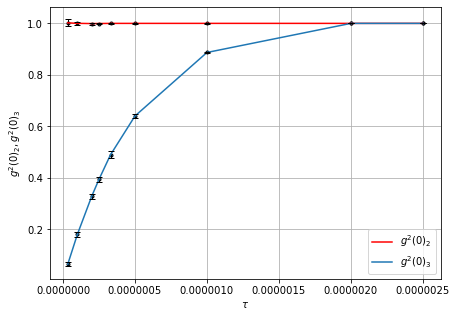

In [5]:
plt.figure(figsize=(7,5))
plt.plot(x,g_2_means,'-',color='red',label='$g^{2}(0)_{2}$')
plt.plot(x,g_3_means,'-',label='$g^{2}(0)_{3}$')
plt.errorbar(x,g_2_means,yerr=g_2_std,fmt='.',ecolor='black',elinewidth=1,capsize=3,barsabove=True,mec='black')
plt.errorbar(x,g_3_means,yerr=g_3_std,fmt='.',ecolor='black',elinewidth=1,capsize=3,barsabove=True,mec='black')
plt.xlabel(r'$\tau$')
plt.ylabel('$g^{2}(0)_{2},g^{2}(0)_{3}$')
plt.legend()
plt.grid(True)
plt.savefig('ex_2_buena.png')